In [102]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt ### Visualization
import seaborn as sns ### Visualization

from sklearn.feature_extraction.text import CountVectorizer


In [103]:
df = pd.read_csv('tokenized_data.csv')

In [104]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: ' '.join(x.replace("'", "").replace(",", "").split()))

In [105]:
df.head()

,Unnamed: 0,hotel,review,tokenized_text
0,0,호텔안테룸서울,the toilet and shower room were very clean the...,[toilet shower bathroom ventilation system diz...
1,1,호텔안테룸서울,all staff were very patient friendly and had g...,[patient english skills help solve]
2,2,호텔안테룸서울,all staff are very friendly there are also sta...,[japanese rest assured view pajamas laundry dr...
3,3,호텔안테룸서울,the accommodation is so clean and spotlessi wa...,[accommodation spotlessi stay big needin pajamas]
4,4,호텔안테룸서울,the room felt smaller than expected but the vi...,[view terrace cozy interior]


In [106]:
stemmer = PorterStemmer()

In [107]:
def tokenize_and_stem(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word.lower()) for word in tokens]
    return ' '.join(stemmed_tokens)

In [108]:
df['stemmed_text'] = df['tokenized_text'].apply(tokenize_and_stem)

In [109]:
vectorizer = CountVectorizer()

In [110]:
vectorized_text = vectorizer.fit_transform(df['stemmed_text'])

In [111]:
print("어간 추출된 단어 인덱스:", vectorizer.vocabulary_)

어간 추출된 단어 인덱스: {'toilet': 24766, 'shower': 21657, 'bathroom': 3278, 'ventil': 26122, 'system': 23951, 'dizzi': 7638, 'comfort': 5812, 'station': 22987, 'close': 5582, 'downtown': 7889, 'get': 10532, 'stay': 23130, 'patient': 17995, 'english': 8496, 'skill': 21938, 'help': 11628, 'solv': 22389, 'japanes': 13329, 'rest': 20003, 'assur': 2725, 'view': 26184, 'pajama': 17802, 'laundri': 14089, 'dryer': 8001, 'accommod': 1527, 'spotlessi': 22719, 'big': 3685, 'needin': 16481, 'terrac': 24202, 'cozi': 6526, 'interior': 12974, 'locat': 14440, 'begin': 3545, 'recept': 19563, 'kind': 13698, 'listen': 14364, 'wine': 27001, 'glass': 10613, 'condit': 6027, 'shampoo': 21430, 'wash': 26472, 'soaptyp': 22298, 'uniqu': 25707, 'soap': 22286, 'form': 9927, 'lather': 14075, 'howev': 12296, 'blew': 3814, 'water': 26535, 'price': 18821, 'rooftop': 20347, 'bar': 3172, 'cocktail': 5677, 'delici': 7109, 'atmospher': 2740, 'notic': 16971, 'breakfast': 4056, 'septemb': 21277, 'restaur': 20016, 'circumst': 5303,

In [112]:
print("카운트 벡터:", vectorized_text.toarray())

카운트 벡터: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [113]:
count_df = pd.DataFrame(vectorized_text.toarray(), columns=vectorizer.get_feature_names_out())

In [114]:
from sklearn.cluster import KMeans

WCSS=[]

In [115]:
for i in range (1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(vectorized_text)
    interia=kmeans.inertia_
    #### inertia_ is the formula used to segregate the data points into clusters
    #### inertia = 관성
    #### Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데 
    #### 이 지점의 K 값을 군집의 개수로 사용 inertia_속성으로 확인할 수 있다 
    print('k:', i, 'inertia:', interia)
    WCSS.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 1 inertia: 601874.184770897
k: 2 inertia: 584640.4768388849
k: 3 inertia: 574783.2258095681
k: 4 inertia: 556481.2743573164
k: 5 inertia: 549922.7636132124
k: 6 inertia: 546970.7722404315
k: 7 inertia: 539068.7431640021
k: 8 inertia: 535435.0514513634
k: 9 inertia: 533710.0756806149
k: 10 inertia: 528925.1160731799
k: 11 inertia: 524573.3275793748
k: 12 inertia: 523398.3156519071
k: 13 inertia: 519417.19666623784
k: 14 inertia: 516766.9617415166
k: 15 inertia: 513808.6276317387
k: 16 inertia: 512923.8931624244
k: 17 inertia: 511750.92897339584
k: 18 inertia: 510023.3169605549
k: 19 inertia: 509011.4536468679


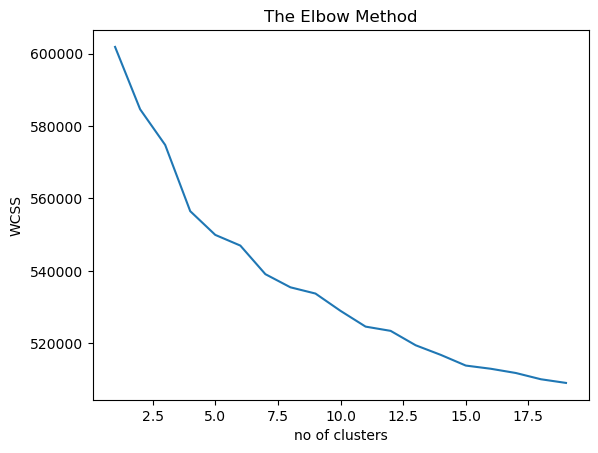

In [116]:
plt.plot(range(1,20), WCSS)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
km_cluster = KMeans(n_clusters=11, max_iter=10000, random_state=0)
km_cluster.fit(vectorized_text)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=11, random_state=0)

In [133]:
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [134]:
df['cluster_label'] = cluster_label
df.head()

,Unnamed: 0,hotel,review,tokenized_text,stemmed_text,cluster_label
0,0,호텔안테룸서울,the toilet and shower room were very clean the...,[toilet shower bathroom ventilation system diz...,[ toilet shower bathroom ventil system dizzi s...,8
1,1,호텔안테룸서울,all staff were very patient friendly and had g...,[patient english skills help solve],[ patient english skill help solv ],3
2,2,호텔안테룸서울,all staff are very friendly there are also sta...,[japanese rest assured view pajamas laundry dr...,[ japanes rest assur view pajama laundri dryer ],3
3,3,호텔안테룸서울,the accommodation is so clean and spotlessi wa...,[accommodation spotlessi stay big needin pajamas],[ accommod spotlessi stay big needin pajama ],1
4,4,호텔안테룸서울,the room felt smaller than expected but the vi...,[view terrace cozy interior],[ view terrac cozi interior ],3


In [135]:
# CSV 파일로 저장
df.to_csv('k=11.csv', index=False)